# Full distribution plot

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from matplotlib.pyplot import figure
import pickle
import pandas as pd
import numpy as np
import holidays
from datetime import timedelta, datetime
import datetime as dt



In [12]:

mu = 100
sigma1 = 10
sigma2 = 20

selected_bid = 120
q1 = stats.norm.cdf(selected_bid, mu, sigma1)
q2 = stats.norm.cdf(selected_bid, mu, sigma2)

Text(96.5, 0.007, '0.84')

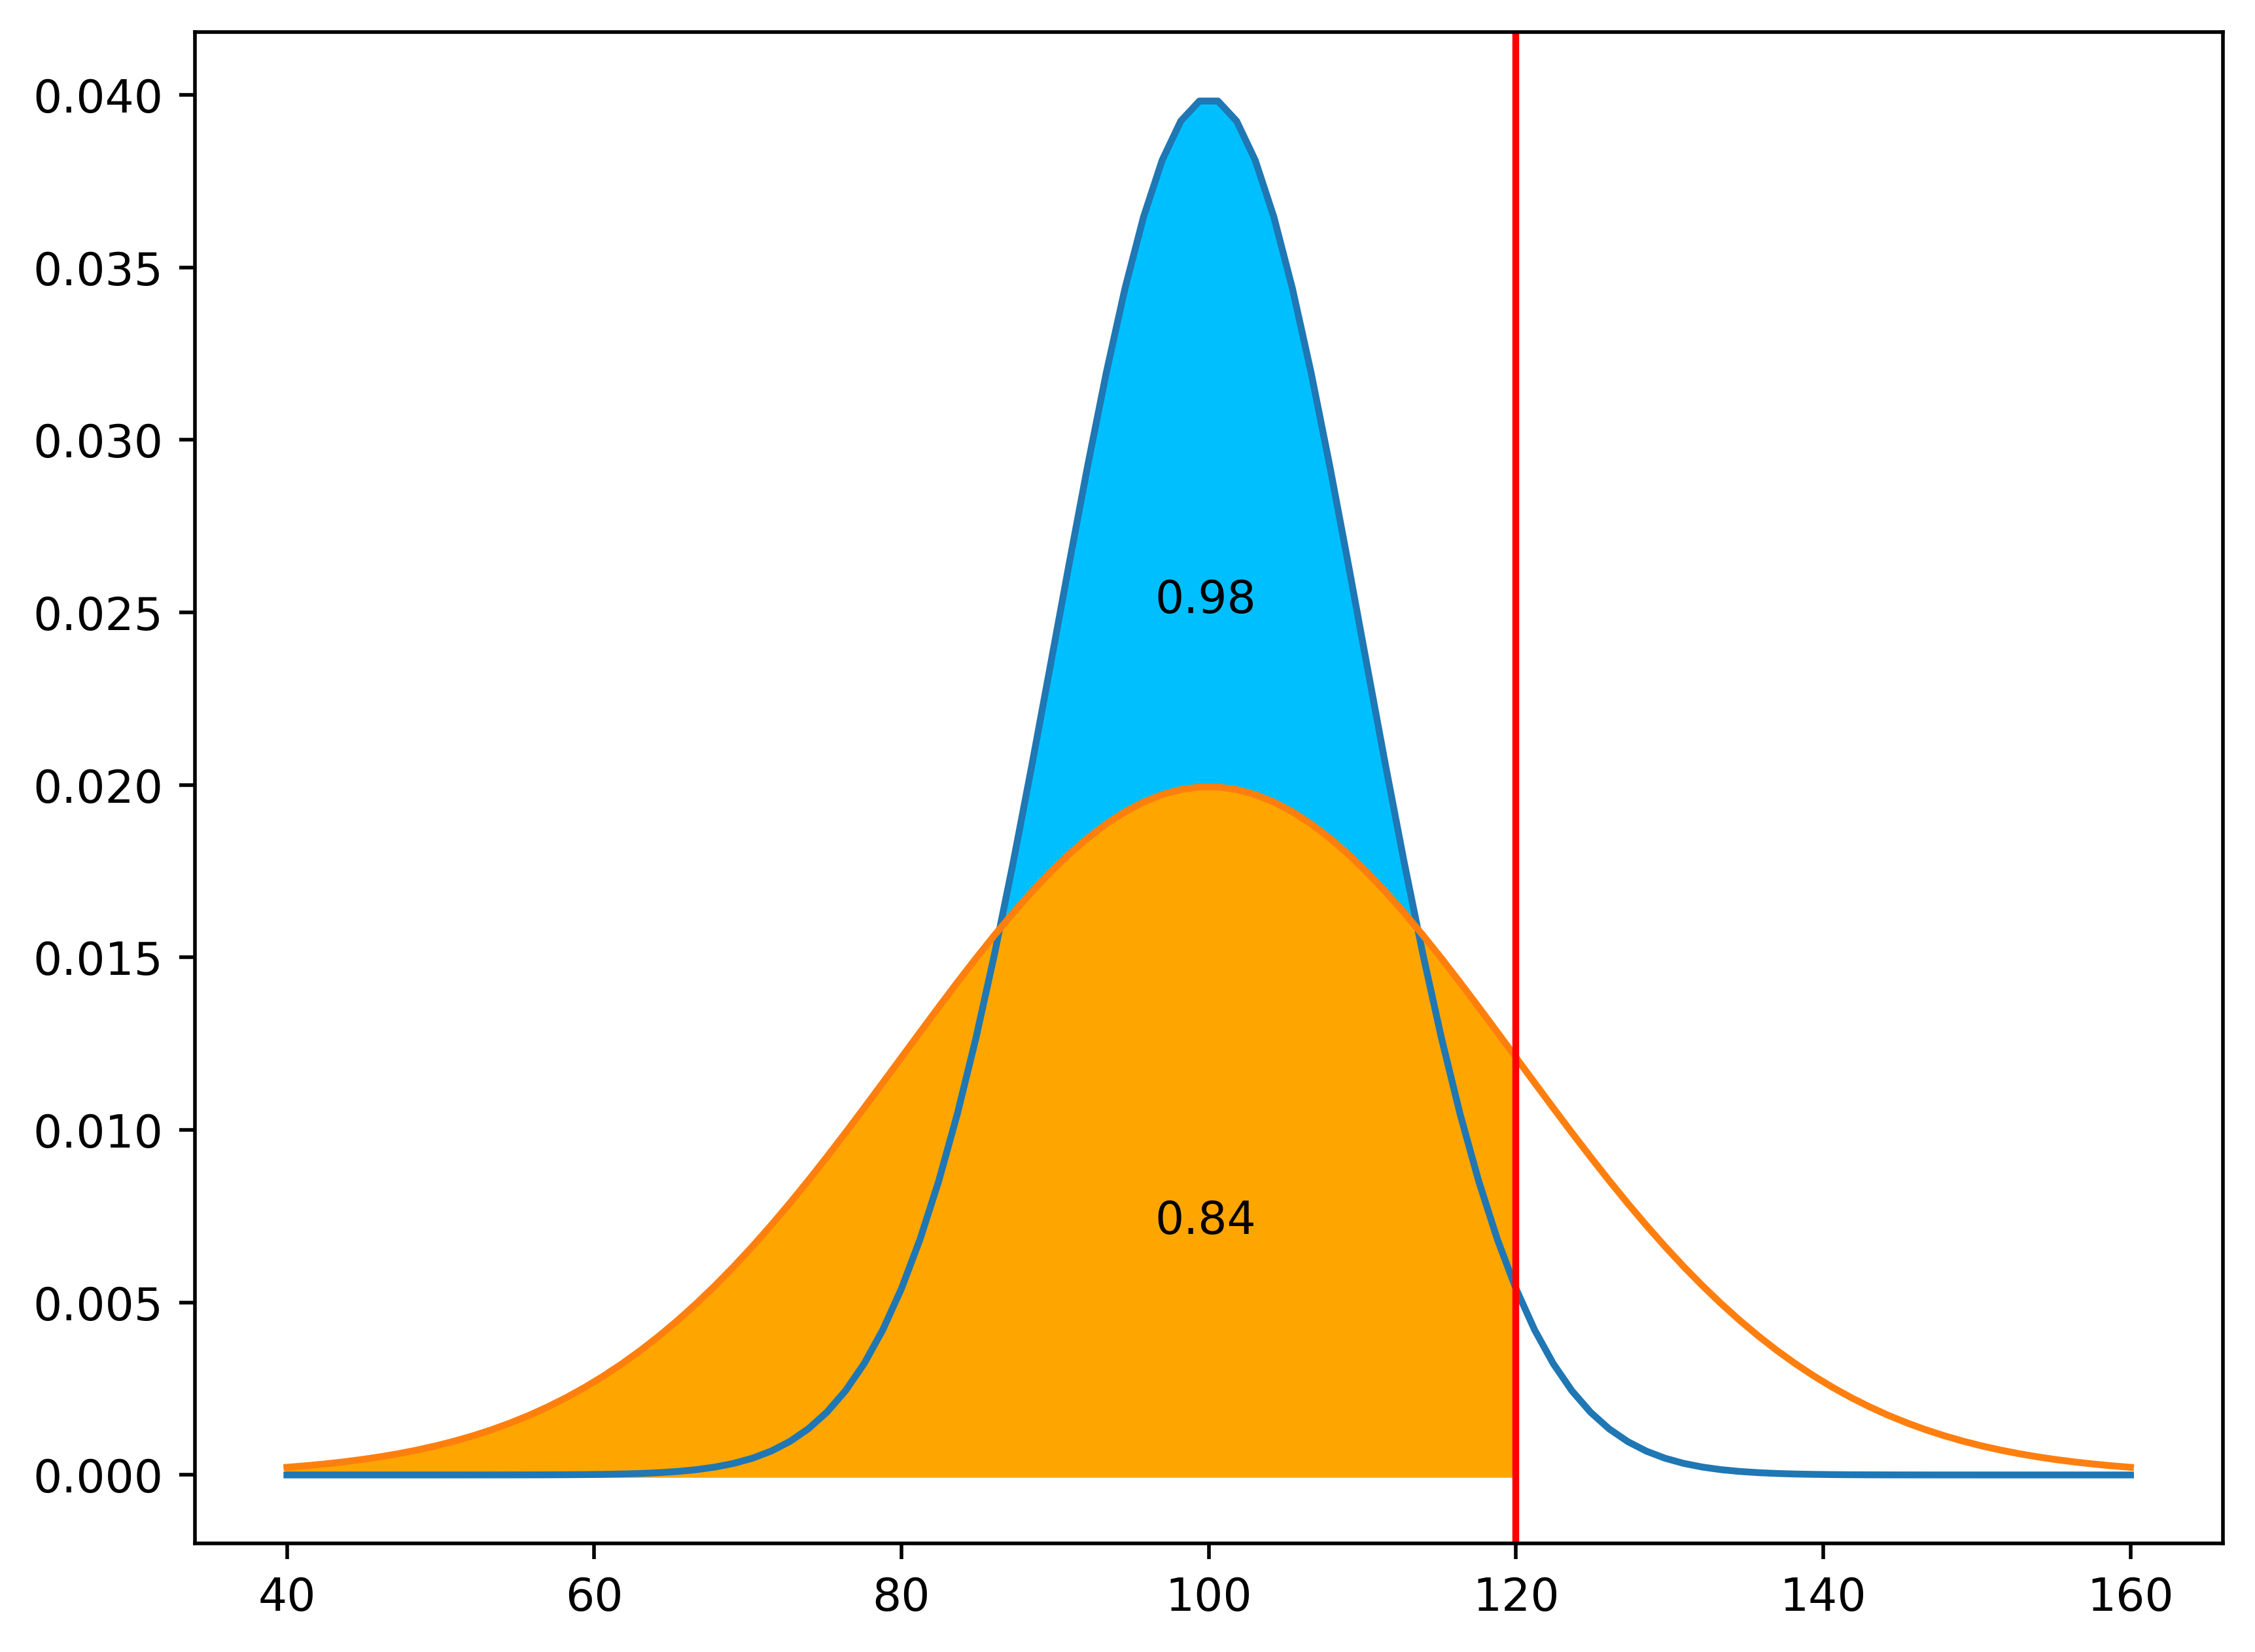

In [13]:
figure(figsize=(8, 6), dpi=500)


x = np.linspace(mu - 3*sigma2, mu + 3*sigma2, 100)
norm1=stats.norm.pdf(x, mu, sigma1)
norm2=stats.norm.pdf(x, mu, sigma2)

plt.plot(x, norm1, label=f"N({mu},{sigma1}\N{SUPERSCRIPT TWO})")
plt.plot(x, norm2, label=f"N({mu},{sigma2}\N{SUPERSCRIPT TWO})")

plt.axvline(x=selected_bid, color='red')

plt.fill_between(x[x<=120],stats.norm.pdf(x[x<=120], mu, sigma1),color='deepskyblue')
plt.fill_between(x[x<=120],stats.norm.pdf(x[x<=120], mu, sigma2),color='orange')

plt.text(mu-3.5,0.025,round(q1,2))
plt.text(mu-3.5,0.007,round(q2,2))


## NN justification plots

In [14]:
import os
path = os.getcwdb().decode("utf-8")+"/data"


Import data, provided by Suena:

In [ ]:
forecast_inputs, auction_data = pickle.load(open(path+"/unscaled_cleaned_data.pkl", "rb"))

In [16]:
df = pd.merge(auction_data, forecast_inputs, on="Date (WET)")

In [17]:
df

,Date (WET),price_first_auction,price_second_auction,traded_volume_first_auction,traded_volume_second_auction,price_forecast_first_auction_x,demand_plus_system_margin,demand,within_day_availability,margin,...,temp,temp_anomaly,forecast_system_price_low,forecast_system_price_high,price_forecast_first_auction_y,day_before_price_first_auction,day_before_price_second_auction,day_before_traded_volume_first_auction,day_before_traded_volume_second_auction,significact_holiday
0,2021-01-01 00:00:00,68.0,65.73,2923.7,5102.4,54.19,56513.64,30182.0,40389.06,-26331.64,...,1.489838,-2.421709,48.33,44.89,54.19,68.00,65.73,2923.7,5102.4,True
1,2021-01-01 01:00:00,62.7,64.96,2825.0,4771.5,53.42,56506.94,29269.0,40389.06,-27237.94,...,1.423462,-2.502601,54.35,53.26,53.42,68.00,65.73,2923.7,5102.4,True
2,2021-01-01 02:00:00,56.0,60.47,2611.4,4176.2,50.13,56502.20,27245.0,40389.06,-29257.20,...,1.276520,-2.603145,32.66,65.86,50.13,68.00,65.73,2923.7,5102.4,True
3,2021-01-01 03:00:00,50.1,52.50,2669.3,3755.9,50.28,56487.24,25545.5,40389.06,-30941.74,...,1.176178,-2.648573,41.55,63.43,50.28,68.00,65.73,2923.7,5102.4,True
4,2021-01-01 04:00:00,50.0,48.98,2741.4,4047.5,47.19,56373.63,24180.0,40389.06,-32193.63,...,1.024994,-2.751995,26.62,66.91,47.19,68.00,65.73,2923.7,5102.4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14876,2022-09-12 19:00:00,465.6,437.60,5809.2,14484.4,513.48,55774.16,32098.0,29032.79,-23676.16,...,20.539612,5.322205,1285.80,444.26,513.48,422.45,435.00,5242.7,12656.9,False
14877,2022-09-12 20:00:00,418.0,391.45,5480.5,14037.4,439.66,55458.04,31226.0,29032.79,-24232.04,...,20.209839,5.847315,-234.22,390.59,439.66,386.50,418.80,4751.0,13784.8,False
14878,2022-09-12 21:00:00,358.7,342.29,4750.4,12785.3,378.48,55172.69,28570.5,29032.79,-26602.19,...,19.843872,6.046189,37.57,324.03,378.48,325.00,381.41,4196.4,12862.2,False
14879,2022-09-12 22:00:00,300.8,275.73,4994.7,11982.3,298.65,54927.50,25978.0,29032.79,-28949.50,...,19.285278,6.374384,401.78,234.41,298.65,274.80,309.99,4140.1,12152.2,False


In [18]:
df['day'] = df["Date (WET)"].dt.day
df['month'] = df["Date (WET)"].dt.month
df['hour'] = df["Date (WET)"].dt.hour
df['weekday'] = df["Date (WET)"].dt.weekday

<Axes: xlabel='day in month', ylabel='electricity price'>

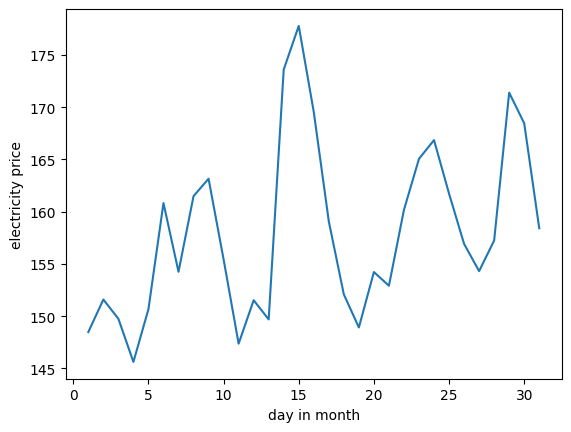

In [19]:
df.groupby('day')['price_first_auction'].mean().plot(ylabel='electricity price', xlabel='day in month')



<Axes: xlabel='hour in day', ylabel='mean electricity price'>

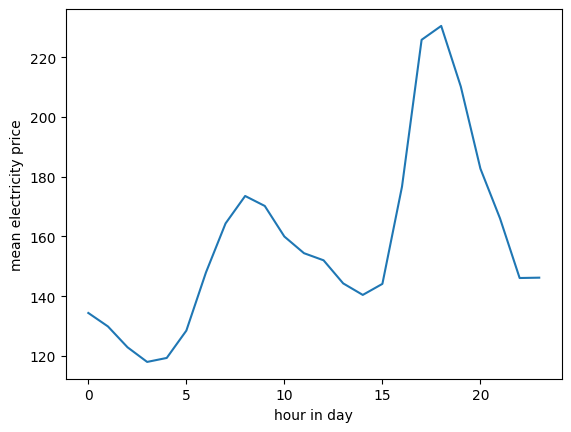

In [20]:
df.groupby('hour')['price_first_auction'].mean().plot(ylabel='mean electricity price', xlabel='hour in day')

#plt.savefig(r'C:\Users\karel\OneDrive\Škola\Matfyz\Doktorát\staz_berlin\energy_trading_prezentation\hour_price.png', dpi = 300, transparent=True)

<Axes: xlabel='day in week', ylabel='mean electricity price'>

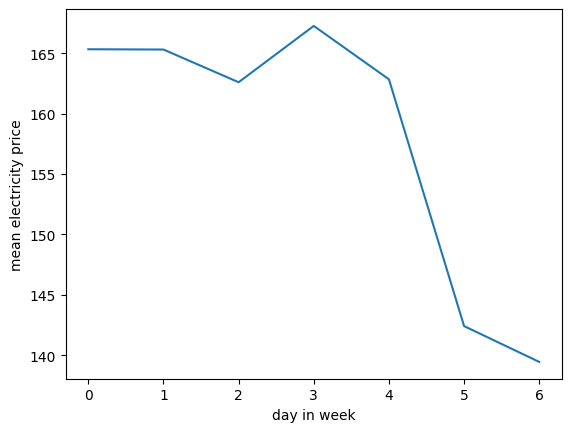

In [21]:
df.groupby('weekday')['price_first_auction'].mean().plot(ylabel='mean electricity price', xlabel='day in week')

<Axes: xlabel='month'>

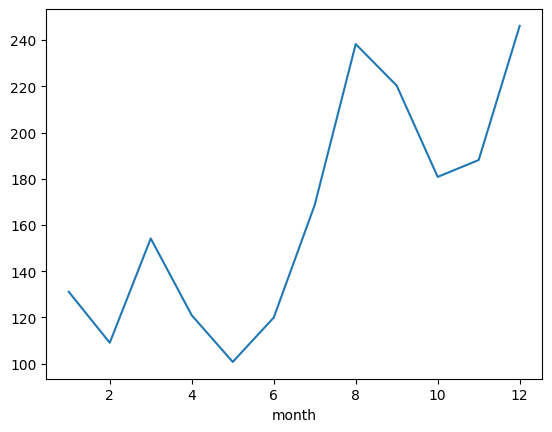

In [22]:
# not useful because of the crisis - changed the output

df.groupby('month')['price_first_auction'].mean().plot()

## Johnson's SU fit plot

In [23]:
from scipy.stats import johnsonsu, uniform, norm, probplot
from statsmodels.api import qqplot

In [24]:
fit=johnsonsu.fit(df['price_first_auction'])

In [25]:
fit

(-2.8911628952872226, 1.461775405107282, 13.836628704558727, 32.3089471740445)

In [28]:
fit_norm=norm.fit(df['price_first_auction'])

In [29]:
fit_norm

(157.84942812983, 112.79254323507868)

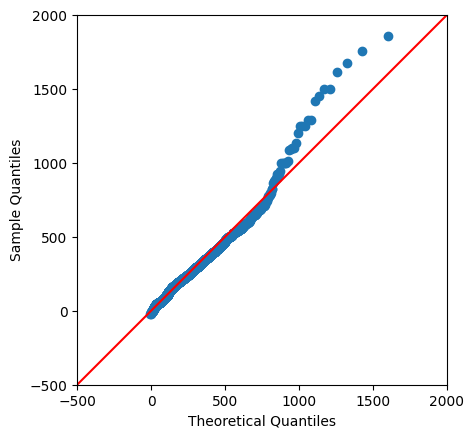

In [26]:
qqplot(df['price_first_auction'], distargs=fit[:2],loc=fit[2],scale=fit[3],dist=johnsonsu)
plt.plot((-10000,10000),(-10000,10000), color="red")
plt.ylabel("Sample Quantiles")
plt.xlabel("Theoretical Quantiles")
plt.title("")
plt.axis("square")
plt.xlim([-500,2000])
plt.ylim([-500,2000])
plt.savefig("johnsonqq.png", dpi=300, bbox_inches="tight")

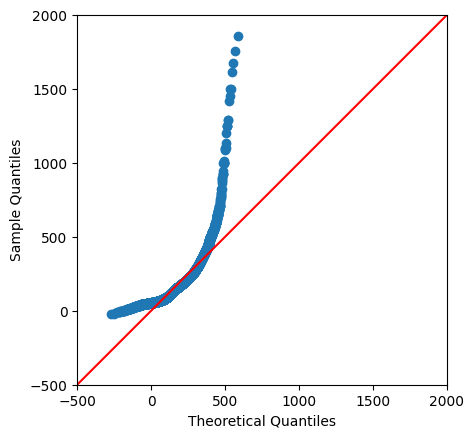

In [30]:
qqplot(df['price_first_auction'], loc=fit_norm[0],scale=fit_norm[1],dist=norm)
plt.plot((-10000,10000),(-10000,10000), color="red")
plt.ylabel("Sample Quantiles")
plt.xlabel("Theoretical Quantiles")
plt.title("")
plt.axis("square")
plt.xlim([-500,2000])
plt.ylim([-500,2000])
plt.savefig("normqq.png", dpi=300, bbox_inches="tight")

In [31]:
df_2022 = df[df["Date (WET)"].dt.year==2022]

In [32]:
fit_2022=johnsonsu.fit(df_2022['price_first_auction'])

In [33]:
fit_2022

(-1.0345145283826636,
 1.2327356595475432,
 130.64464002475256,
 64.98625394396473)

In [34]:
norm_fit_2022 = norm.fit(df_2022['price_first_auction'])

In [35]:
norm_fit_2022

(215.13633436836085, 104.46370424274181)

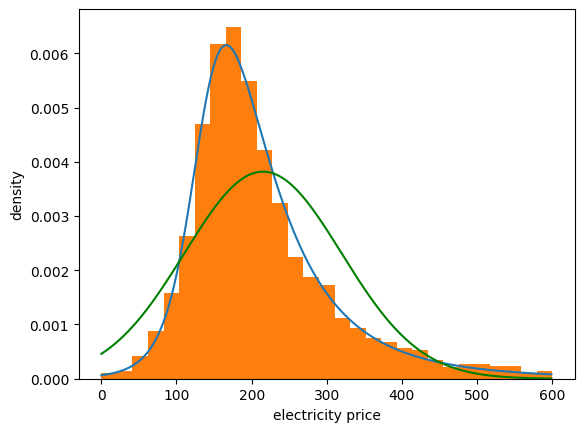

In [37]:
plt.plot(johnsonsu.pdf(range(0,600),*fit_2022), label='fitted johnsonsu density')
plt.plot(norm.pdf(range(0,600),*norm_fit_2022), label='fitted normal density', color='green')
plt.xlabel('electricity price')
plt.ylabel('density')
df_2022['price_first_auction'].hist(density=True, bins = np.linspace(0,600, 30), label= 'empiricial histogram')
#plt.legend(loc="upper right")
plt.grid(False)
